# Meta Kaggle Dataset Analysis - 2 - Competitions
Kaggle's public data on competitions, users, submission scores, and kernels

- https://www.kaggle.com/datasets/kaggle/meta-kaggle


In [2]:
%%html
<style type='text/css'>
.CodeMirror {
    font-size: 14px; 
    font-family: 'Jetbrains Mono';
}
</style>

In [3]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [4]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, BooleanType
from pyspark.sql.functions import *

In [8]:
spark = (SparkSession
        .builder
        .appName("meta-kaggle-data-analysis")
        .getOrCreate()
        )

23/08/16 07:22:23 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [9]:
spark

In [10]:
data_files_path = "/Volumes/samsung-2tb/rk/downloads/archive"

In [11]:
!ls -lhS $data_files_path

total 54139600
-rw-rw-r--@ 1 rk  staff    12G 11 Aug 11:20 EpisodeAgents.csv
-rw-rw-r--@ 1 rk  staff   4.0G 11 Aug 11:43 UserAchievements.csv
-rw-rw-r--@ 1 rk  staff   3.3G 11 Aug 11:36 Episodes.csv
-rw-rw-r--@ 1 rk  staff   1.5G 11 Aug 11:40 Submissions.csv
-rw-rw-r--@ 1 rk  staff   1.3G 11 Aug 11:39 KernelVersions.csv
-rw-rw-r--@ 1 rk  staff   796M 11 Aug 11:45 Users.csv
-rw-rw-r--@ 1 rk  staff   748M 11 Aug 11:18 DatasetVersions.csv
-rw-rw-r--@ 1 rk  staff   663M 11 Aug 11:38 ForumMessages.csv
-rw-rw-r--@ 1 rk  staff   505M 11 Aug 11:42 Teams.csv
-rw-rw-r--@ 1 rk  staff   279M 11 Aug 11:42 TeamMemberships.csv
-rw-rw-r--@ 1 rk  staff   198M 11 Aug 11:39 KernelVersionDatasetSources.csv
-rw-rw-r--@ 1 rk  staff   156M 11 Aug 11:40 KernelVotes.csv
-rw-rw-r--@ 1 rk  staff   144M 11 Aug 11:40 Kernels.csv
-rw-rw-r--@ 1 rk  staff   130M 11 Aug 11:38 ForumMessageVotes.csv
-rw-rw-r--@ 1 rk  staff    64M 11 Aug 11:19 DatasetVotes.csv
-rw-rw-r--@ 1 rk  staff    51M 11 Aug 11:45 UserFollowers.csv

- `EpisodeAgents.csv` is the biggest file (~12G)
- There are 4 more files that are bigger.

****

## 5. Competitions

In [12]:
competitions_file = f"{data_files_path}/Competitions.csv"

In [13]:
competitions_schema = StructType([
    StructField("Id",IntegerType()),
    StructField("Slug",StringType()),
    StructField("Title",StringType()),
    StructField("Subtitle",StringType()),
    StructField("HostSegmentTitle",StringType()),
    StructField("ForumId",IntegerType()),
    StructField("OrganizationId",IntegerType()),
    StructField("EnabledDate",StringType()),
    StructField("DeadlineDate",StringType()),
    StructField("ProhibitNewEntrantsDeadlineDate",StringType()),
    StructField("TeamMergerDeadlineDate",StringType()),
    StructField("TeamModelDeadlineDate",StringType()),
    StructField("ModelSubmissionDeadlineDate",StringType()),
    StructField("FinalLeaderboardHasBeenVerified",BooleanType()),
    StructField("HasKernels",BooleanType()),
    StructField("OnlyAllowKernelSubmissions",BooleanType()),
    StructField("HasLeaderboard",BooleanType()),
    StructField("LeaderboardPercentage",IntegerType()),
    StructField("LeaderboardDisplayFormat",StringType()),
    StructField("EvaluationAlgorithmAbbreviation",StringType()),
    StructField("EvaluationAlgorithmName",StringType()),
    StructField("EvaluationAlgorithmDescription",StringType()),
    StructField("EvaluationAlgorithmIsMax",BooleanType()),
    StructField("MaxDailySubmissions",IntegerType()),
    StructField("NumScoredSubmissions",IntegerType()),
    StructField("MaxTeamSize",IntegerType()),
    StructField("BanTeamMergers",BooleanType()),
    StructField("EnableTeamModels",BooleanType()),
    StructField("RewardType",StringType()),
    StructField("RewardQuantity",IntegerType()),
    StructField("NumPrizes",IntegerType()),
    StructField("UserRankMultiplier",IntegerType()),
    StructField("CanQualifyTiers",BooleanType()),
    StructField("TotalTeams",IntegerType()),
    StructField("TotalCompetitors",IntegerType()),
    StructField("TotalSubmissions",IntegerType()),
    StructField("ValidationSetName",StringType()),
    StructField("ValidationSetValue",StringType()),
    StructField("EnableSubmissionModelHashes",BooleanType()),
    StructField("EnableSubmissionModelAttachments",BooleanType()),
    StructField("HostName",StringType()),
    StructField("CompetitionTypeId",IntegerType()),
])

In [14]:
competitions = spark.read.csv(competitions_file, header=True, schema=competitions_schema)
competitions.createOrReplaceTempView("competitions")

competitions.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- Slug: string (nullable = true)
 |-- Title: string (nullable = true)
 |-- Subtitle: string (nullable = true)
 |-- HostSegmentTitle: string (nullable = true)
 |-- ForumId: integer (nullable = true)
 |-- OrganizationId: integer (nullable = true)
 |-- EnabledDate: string (nullable = true)
 |-- DeadlineDate: string (nullable = true)
 |-- ProhibitNewEntrantsDeadlineDate: string (nullable = true)
 |-- TeamMergerDeadlineDate: string (nullable = true)
 |-- TeamModelDeadlineDate: string (nullable = true)
 |-- ModelSubmissionDeadlineDate: string (nullable = true)
 |-- FinalLeaderboardHasBeenVerified: boolean (nullable = true)
 |-- HasKernels: boolean (nullable = true)
 |-- OnlyAllowKernelSubmissions: boolean (nullable = true)
 |-- HasLeaderboard: boolean (nullable = true)
 |-- LeaderboardPercentage: integer (nullable = true)
 |-- LeaderboardDisplayFormat: string (nullable = true)
 |-- EvaluationAlgorithmAbbreviation: string (nullable = true)
 |-- Evalu

23/08/16 07:22:41 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [15]:
competitions.limit(1).toPandas()

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,LeaderboardDisplayFormat,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
0,2408,Eurovision2010,Forecast Eurovision Voting,"This competition requires contestants to forecast the voting for this year's Eurovision Song Contest in Norway on May 25th, 27th and 29th.",Featured,2,NaN,04/07/2010 07:57:43,05/25/2010 18:00:00,None,None,None,None,True,True,False,False,10,0.00000,AE,Absolute Error,Sum of absolute values of all errors.,False,5,5,20,False,False,USD,NaN,1,1,False,22,25,22,None,None,False,False,None,1


In [16]:
spark.sql("SELECT COUNT(*) FROM competitions").toPandas()

,count(1)
0,5611


In [39]:
competition_summary = spark.sql("""
WITH temp AS (
SELECT
    Slug
  , Title
  , Subtitle
  , EvaluationAlgorithmName
  , EvaluationAlgorithmDescription
  , CASE
      WHEN LENGTH(EnabledDate) >= 10 AND 
           regexp_extract(EnabledDate, r"(\d{2}/\d{2}/\d{4})", 1) != "" AND
           regexp_extract(EnabledDate, r"(\d{2}/\d{2}/\d{4})", 1) IS NOT NULL THEN
          to_date(SUBSTR(EnabledDate, 1, 10), "MM/dd/yyyy")
      ELSE
          '2010-01-01'
    END AS EnabledDate
FROM
    competitions
)
SELECT
    EnabledDate
  , YEAR(EnabledDate) AS competition_year
  , Slug
  , Title
  , Subtitle
  , EvaluationAlgorithmName
  , EvaluationAlgorithmDescription    
FROM
    temp
""")

competition_summary.createOrReplaceTempView("competition_summary")
spark.sql("SELECT * FROM competition_summary ORDER BY EnabledDate DESC LIMIT 20").toPandas()

,EnabledDate,competition_year,Slug,Title,Subtitle,EvaluationAlgorithmName,EvaluationAlgorithmDescription
0,2023-07-11,2023,playground-series-s3e19,Forecasting Mini-Course Sales,"Playground Series - Season 3, Episode 19",SMAPE,Symmetric Mean Absolute Percentage Error
1,2023-06-27,2023,playground-series-s3e18,Explore Multi-Label Classification with an Enzyme Substrate Dataset,"Playground Series - Season 3, Episode 18",Mean Columnwise Area Under Receiver Operating Characteristic Curve,Average of the per-column AUC-ROC scores.
2,2023-06-13,2023,playground-series-s3e17,Binary Classification of Machine Failures,"Playground Series - Season 3, Episode 17",Area Under Receiver Operating Characteristic Curve,"Measures discrimination. Calculates how well an algorithm separates true positives from false positives. Overall good metric for classification problems. Has range [0.5, 1.0]"
3,2023-05-30,2023,playground-series-s3e16,Regression with a Crab Age Dataset,"Playground Series - Season 3, Episode 16",Mean Absolute Error,Average of the absolute value of each individual error.
4,2023-05-22,2023,hubmap-hacking-the-human-vasculature,HuBMAP - Hacking the Human Vasculature,Segment instances of microvascular structures from healthy human kidney tissue slides.,OpenImagesObjDetectionSegmentationAP,OpenImagesObjDetectionSegmentationAP
5,2023-05-16,2023,playground-series-s3e15,Feature Imputation with a Heat Flux Dataset,"Playground Series - Season 3, Episode 15",Root Mean Squared Error,Square root of the average of the squared errors.
6,2023-05-11,2023,2023-kaggle-ai-report,2023 Kaggle AI Report,Essays on the state of machine learning in 2023,Mean Absolute Error,Mean absolute error regression loss. See https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
7,2023-05-04,2023,iclr-2023-kagglezindi,ICLR 2023 Kaggle/Zindi Hackathon,Predict CO2 Emissions,Root Mean Squared Error,Square root of the average of the squared errors.
8,2023-05-02,2023,playground-series-s3e14,Prediction of Wild Blueberry Yield,"Playground Series - Season 3, Episode 14",Mean Absolute Error,Average of the absolute value of each individual error.
9,2023-04-18,2023,playground-series-s3e13,Classification with a Tabular Vector Borne Disease Dataset,"Playground Series - Season 3, Episode 13",MAP@{K},Mean Average Precision at K


### Competitions per year

In [44]:
df = spark.sql("""
SELECT
    competition_year
  , COUNT(*) AS count
FROM
    competition_summary
GROUP BY
    competition_year
ORDER BY
    competition_year
""").toPandas()

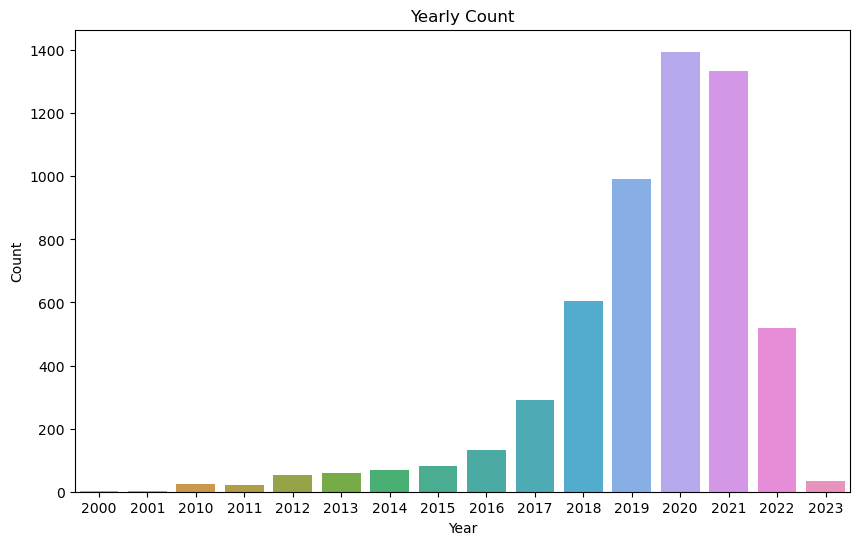

In [45]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='competition_year', y='count', data=df)
plt.title('Yearly Count')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

****

### Submissions

In [63]:
spark.sql("""
SELECT
    Id
  , Title
  , MaxDailySubmissions
  , NumScoredSubmissions
  , MaxTeamSize
  , BanTeamMergers
  , EnableTeamModels
  , RewardType
  , NVL(RewardQuantity, 0) AS RewardQuantity
  , NumPrizes
  , UserRankMultiplier
  , CanQualifyTiers
  , TotalTeams
  , TotalCompetitors
  , TotalSubmissions
FROM
    competitions
LIMIT 5
""").toPandas()

,Id,Title,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
0,2408,Forecast Eurovision Voting,5,5,20,False,False,USD,0,1,1.0,False,22,25,22
1,2435,Predict HIV Progression,4,4,20,False,False,USD,0,1,1.0,True,107,116,855
2,2438,World Cup 2010 - Take on the Quants,5,5,20,False,False,USD,0,1,NaN,False,0,0,0
3,2439,INFORMS Data Mining Contest 2010,5,5,20,False,False,USD,0,1,1.0,True,145,153,1483
4,2442,World Cup 2010 - Confidence Challenge,5,5,20,False,False,USD,0,1,NaN,False,63,64,63


### Top 5 competitions based on Total competitors

In [64]:
spark.sql("""
SELECT
    Id
  , Title
  , Slug
  , Subtitle
  , MaxDailySubmissions
  , NumScoredSubmissions
  , MaxTeamSize
  , BanTeamMergers
  , EnableTeamModels
  , RewardType
  , NVL(RewardQuantity, 0) AS RewardQuantity
  , NumPrizes
  , UserRankMultiplier
  , CanQualifyTiers
  , TotalTeams
  , TotalCompetitors
  , TotalSubmissions
FROM
    competitions
ORDER BY
    TotalCompetitors DESC
LIMIT 5
""").toPandas()

,Id,Title,Slug,Subtitle,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
0,10385,Santander Customer Transaction Prediction,santander-customer-transaction-prediction,Can you identify who will make a transaction?,3,2,5,False,True,USD,0,5,1,True,8751,9787,104121
1,9120,Home Credit Default Risk,home-credit-default-risk,Can you predict how capable each applicant is of repaying a loan?,5,2,20,False,True,USD,0,3,1,True,7176,8373,131888
2,14242,IEEE-CIS Fraud Detection,ieee-fraud-detection,Can you detect fraud from customer transactions?,5,2,5,False,True,USD,0,3,1,True,6351,7389,125219
3,18599,M5 Forecasting - Accuracy,m5-forecasting-accuracy,Estimate the unit sales of Walmart retail goods,5,1,5,False,True,USD,0,5,1,True,5558,7022,88741
4,35332,American Express - Default Prediction,amex-default-prediction,Predict if a customer will default in the future,5,2,5,False,True,USD,0,4,1,True,4874,6003,90058


### Competition that received max submissions

In [69]:
spark.sql("""
SELECT
    *
FROM
    competitions 
ORDER BY TotalSubmissions DESC
LIMIT 3
""").toPandas()

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,LeaderboardDisplayFormat,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,ValidationSetName,ValidationSetValue,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,HostName,CompetitionTypeId
0,9120,home-credit-default-risk,Home Credit Default Risk,Can you predict how capable each applicant is of repaying a loan?,Featured,35355,1536,05/17/2018 22:56:29,08/29/2018 23:59:00,08/22/2018 23:59:00,08/22/2018 23:59:00,09/14/2018 23:59:00,None,True,True,False,True,20,0.00000,AUC,Area Under Receiver Operating Characteristic Curve,"Measures discrimination. Calculates how well an algorithm separates true positives from false positives. Overall good metric for classification problems. Has range [0.5, 1.0]",True,5,2,20,False,True,USD,NaN,3,1,True,7176,8373,131888,None,None,False,False,None,1
1,14242,ieee-fraud-detection,IEEE-CIS Fraud Detection,Can you detect fraud from customer transactions?,Research,275877,3016,07/15/2019 20:47:11,10/03/2019 23:59:00,10/03/2019 23:59:00,09/24/2019 23:59:00,10/26/2019 00:00:00,None,True,True,False,True,20,0.000000,AUC,Area Under Receiver Operating Characteristic Curve,"Measures discrimination. Calculates how well an algorithm separates true positives from false positives. Overall good metric for classification problems. Has range [0.5, 1.0]",True,5,2,5,False,True,USD,NaN,3,1,True,6351,7389,125219,None,None,False,False,None,1
2,10385,santander-customer-transaction-prediction,Santander Customer Transaction Prediction,Can you identify who will make a transaction?,Featured,130117,141,02/13/2019 23:00:00,04/10/2019 23:59:00,04/03/2019 23:59:00,04/03/2019 23:59:00,05/01/2019 00:00:00,None,True,True,False,True,25,0.00000,AUC,Area Under Receiver Operating Characteristic Curve,"Measures discrimination. Calculates how well an algorithm separates true positives from false positives. Overall good metric for classification problems. Has range [0.5, 1.0]",True,3,2,5,False,True,USD,NaN,5,1,True,8751,9787,104121,None,None,False,False,None,1


### All competitions

In [67]:
spark.sql("""
SELECT
    Title
  , Subtitle
FROM
    competitions
ORDER BY
    Title
""").toPandas()

,Title,Subtitle
0,"""""""Clever"""" questions classification""",The challenge is distinguish questions prepared by professional authors from questions suggested by game users.
1,"""""""Сириус""""","зима 2019"""
2,"""2021 Academic Competition """"Uplift Modeling""""""",Rank clients according to their purchasing responsiveness to communication
3,"""STAT6031 """"Crime"""" Project""",Course Project in Fall 2019
4,"""SejongAI.텀프로젝트.[""""범죄유형예측""""]""",세종대학교 인공지능 텀 프로젝트 [18011863]_[최영민]
5,"""Узнай героев сериала """"Друзья"""" с первых слов""","""В задании необходимо научиться предсказывать, кому из 6 главных героев сериала """"Друзья"""" принадлежит реплика."""
6,"""אכ""""אתון""",חיזוי נשר מיטב
7,"""אכ""""אתון""",חיזוי נשר מיטב
8,#HomeAlone2020,Welcome all for #homeAlone2020 kaggle competiton.
9,#HomeAlone2020,Welcome all for #homeAlone2020 kaggle competiton.


In [70]:
spark.stop()